In [0]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/Colab Notebooks/py_assign 

/content/drive/My Drive/Colab Notebooks/py_assign


In [0]:
import pandas as pd
from copulas.multivariate import GaussianMultivariate
import sys
import utils
import numpy as np  

In [0]:
def handle_non_numerical_data(data):
    columns = data.columns.values

    for column in columns:
        text_digit_vals = {}

        def convert_to_int(val):
            return text_digit_vals[val]

        if data[column].dtype != np.int64 and data[column].dtype != np.float64:
            column_contents = data[column].values.tolist()
            unique_elements = set(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x = x + 1

            data[column] = list(map(convert_to_int, data[column]))

    return data

In [0]:
copula = GaussianMultivariate()
data = pd.read_excel('data.xlsx')
data = handle_non_numerical_data(data)

In [0]:
data = data.replace(np.nan,0)

In [0]:
data.head()

,Unnamed: 0,Unnamed: 1,Factor Loadings,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26
0,101,1,73,20,26,50,42,0.000000,2,1,1,1,2,57,0.0,82,73,7,0,0,0.0,0,5,5,2,1,6
1,0,0,22,0,0,0,0,0.055583,0,0,0,0,0,0,0.0,0,11,2,1,1,0.0,0,0,0,0,0,0
2,0,0,51,1,60,89,97,0.000000,0,0,0,0,0,0,0.0,0,0,0,1,2,0.0,0,0,0,0,0,0
3,1,3,77,74,74,88,10,0.000000,1,2,2,2,1,100,0.0,100,24,1,2,1,1.0,5,7,7,7,7,7
4,2,6,52,13,61,46,98,0.000000,1,2,2,2,1,64,0.0,1,28,5,3,1,2.0,1,6,6,6,2,4


In [0]:
copula.fit(data)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


In [0]:
num_samples = 1000
samples = copula.sample(num_samples)

In [0]:
model_path = 'mymodel.pkl'
copula.save(model_path)

In [0]:
copula_params = copula.to_dict()
print(copula_params)
print(type(copula_params))

{'covariance': [[0.9914845315176679, 0.04184433658410097, 0.03288527696147693, -0.03529466000687392, -0.13247684498214315, -0.17927490822669157, -0.03782731381273307, -3.569644411775154e-33, 0.19750439439579887, 0.05770571899535679, 0.05770571899535679, 0.05770571899535679, 0.19750439439579887, 0.12996026556316373, -8.98207961390261e-32, 0.26424300922257865, 0.21062490389877606, 0.18947083696334682, 0.020204797895257497, -0.2415010838746474, -0.352049881780852, -0.3600386361669552, -0.24686898810454178, -0.24686898810454178, -0.33150978404477915, -0.35737224947091245, -0.21659814788837206], [0.04184433658410097, 0.9388149407801467, 0.09128325296594379, 0.07496238466645654, 0.10923090337112237, -0.06053353468554455, 0.09254754558069295, -2.8793606099254716e-33, 0.03934048789759487, 0.2697775529977754, 0.2697775529977754, 0.2697775529977754, 0.03934048789759487, 0.1498952111058496, -4.2713693816112953e-32, -0.09823832119879221, -0.014835545507334652, 0.2853347937268479, 0.330215921788749

In [0]:
print(type(copula_params))

<class 'dict'>


In [0]:
list(copula_params.keys())  

['covariance', 'distribs', 'type', 'fitted', 'distribution']

In [0]:
print(copula_params.get("covariance"))

[[0.9914845315176679, 0.04184433658410097, 0.03288527696147693, -0.03529466000687392, -0.13247684498214315, -0.17927490822669157, -0.03782731381273307, -3.569644411775154e-33, 0.19750439439579887, 0.05770571899535679, 0.05770571899535679, 0.05770571899535679, 0.19750439439579887, 0.12996026556316373, -8.98207961390261e-32, 0.26424300922257865, 0.21062490389877606, 0.18947083696334682, 0.020204797895257497, -0.2415010838746474, -0.352049881780852, -0.3600386361669552, -0.24686898810454178, -0.24686898810454178, -0.33150978404477915, -0.35737224947091245, -0.21659814788837206], [0.04184433658410097, 0.9388149407801467, 0.09128325296594379, 0.07496238466645654, 0.10923090337112237, -0.06053353468554455, 0.09254754558069295, -2.8793606099254716e-33, 0.03934048789759487, 0.2697775529977754, 0.2697775529977754, 0.2697775529977754, 0.03934048789759487, 0.1498952111058496, -4.2713693816112953e-32, -0.09823832119879221, -0.014835545507334652, 0.2853347937268479, 0.33021592178874976, -0.04810457

In [0]:
print(copula_params.get("distribs"))

{'Unnamed: 0': {'type': 'copulas.univariate.gaussian.GaussianUnivariate', 'fitted': True, 'mean': 50.00970873786408, 'std': 29.71564105342736}, 'Unnamed: 1': {'type': 'copulas.univariate.gaussian.GaussianUnivariate', 'fitted': True, 'mean': 4.203883495145631, 'std': 1.4770688850832199}, 'Factor Loadings': {'type': 'copulas.univariate.gaussian.GaussianUnivariate', 'fitted': True, 'mean': 51.0, 'std': 29.732137494637012}, 'Unnamed: 3': {'type': 'copulas.univariate.gaussian.GaussianUnivariate', 'fitted': True, 'mean': 51.0, 'std': 29.732137494637012}, 'Unnamed: 4': {'type': 'copulas.univariate.gaussian.GaussianUnivariate', 'fitted': True, 'mean': 51.0, 'std': 29.732137494637012}, 'Unnamed: 5': {'type': 'copulas.univariate.gaussian.GaussianUnivariate', 'fitted': True, 'mean': 51.0, 'std': 29.732137494637012}, 'Unnamed: 6': {'type': 'copulas.univariate.gaussian.GaussianUnivariate', 'fitted': True, 'mean': 51.0, 'std': 29.732137494637012}, 'Unnamed: 7': {'type': 'copulas.univariate.gaussian.

In [0]:
print(copula_params.get("type"))

copulas.multivariate.gaussian.GaussianMultivariate


In [0]:
print(copula_params.get("fitted"))

True


In [0]:
print(copula_params.get("distribution"))

copulas.univariate.gaussian.GaussianUnivariate


In [0]:
# samples.corr()
a = samples
# list(a.columns) 
tmp = a.drop(['Unnamed: 0',
 'Unnamed: 1',
 'Unnamed: 7',
 'Unnamed: 8',
 'Unnamed: 9',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Unnamed: 13',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 'Unnamed: 26'], axis=1)
tmp.head()

,Factor Loadings,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,8.023098,40.524861,33.179460,2.101020,39.014180
1,54.022903,13.820276,83.632520,48.513248,53.266422
2,17.446692,117.610072,50.018579,45.590367,34.537907
3,73.765380,70.574786,70.366731,80.274378,17.915009
4,-32.079105,44.919402,56.363157,60.158135,33.734217


In [0]:
tmp = tmp.rename(columns={"Factor Loadings": "60%", "Unnamed: 3": "25%", "Unnamed: 4": "10%", "Unnamed: 5": "3%", "Unnamed: 6": "2%"})
tmp.head()

,60%,25%,10%,3%,2%
0,8.023098,40.524861,33.179460,2.101020,39.014180
1,54.022903,13.820276,83.632520,48.513248,53.266422
2,17.446692,117.610072,50.018579,45.590367,34.537907
3,73.765380,70.574786,70.366731,80.274378,17.915009
4,-32.079105,44.919402,56.363157,60.158135,33.734217


In [0]:
tmp.tail()

,60%,25%,10%,3%,2%
995,55.234662,19.021138,59.062753,34.479663,46.045075
996,52.837032,38.660250,74.539660,52.731803,56.152247
997,29.275184,61.589292,82.424742,83.753700,67.182363
998,8.705218,41.131489,66.433303,109.561717,63.966428
999,86.393988,79.389986,42.100877,48.085146,31.974789


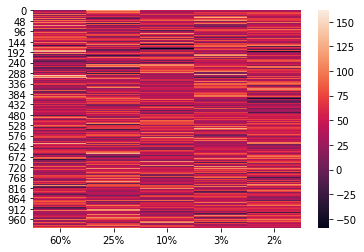

In [0]:
import seaborn as sns
sns.heatmap(tmp)